## Loan Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# load the customer data 
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

--2020-11-27 04:28:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.002s  

2020-11-27 04:28:01 (20.0 MB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



# Dataset cleaning

In [3]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
# pre-processing
#Address column is not numeric field, would like to exclude
df = cust_df.drop('Address',axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
# since "Defaulted" column is the train/predict value with NAN values, for model accuracy, we need to drop it
print("The sahape of dataset before cleanning: ", df.size)
df = df.dropna()
df = df.reset_index(drop=True)
df.head()
print("The sahape of dataset after cleanning: ", df.size)

The sahape of dataset before cleanning:  7650
The sahape of dataset after cleanning:  6300


In [6]:
# tranform the dataframe to array
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [7]:
X = df[['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt',  'DebtIncomeRatio']].values.astype(float)

y=df['Defaulted'].values.astype(int)
X[0:5]
#y[0:5]

array([[1.000e+00, 4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01,
        1.073e+00, 6.300e+00],
       [2.000e+00, 4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00,
        8.218e+00, 1.280e+01],
       [3.000e+00, 3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00,
        5.802e+00, 2.090e+01],
       [4.000e+00, 2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01,
        5.160e-01, 6.300e+00],
       [5.000e+00, 4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00,
        8.908e+00, 7.200e+00]])

## KNN

In [8]:
# Normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.76624318,  0.76830405,  0.29879269, -0.35900652, -0.72310225,
        -0.67569934, -0.60428433, -0.58052847],
       [-1.76213049,  1.51908977, -0.77932527,  2.64702891,  1.47870741,
         1.43142147,  1.5706204 ,  0.37222169],
       [-1.75801779, -0.23274357,  0.29879269,  0.24220057,  0.30984549,
         2.15411948,  0.83520125,  1.55949495],
       [-1.7539051 , -0.73326739,  0.29879269, -0.65961006, -0.72310225,
        -0.41242741, -0.77383254, -0.58052847],
       [-1.74979241,  1.51908977, -0.77932527,  3.39853777,  5.6376812 ,
         3.66521532,  1.78065319, -0.44860921]])

In [9]:
# Train Test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set: ",X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (560, 8) (560,)
Test set:  (140, 8) (140,)


In [10]:
# KNN training
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## loop in 10 Ks number to find the best K value
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1,Ks):
    #train model and predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])


mean_acc

array([0.71428571, 0.76428571, 0.73571429, 0.77857143, 0.77857143,
       0.75      , 0.75      , 0.74285714, 0.74285714])

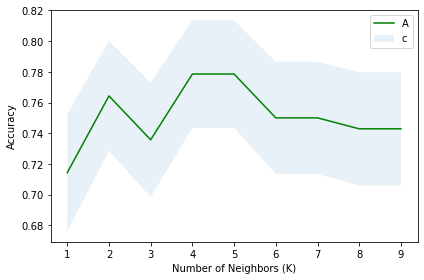

The best accuracy was 0.7785714285714286 with k= 4


In [11]:
#plot model accuracy for different number of neighbors
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend('Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print("The best accuracy was", mean_acc.max(), "with k=",mean_acc.argmax()+1)

In [22]:
# Accuracy 
K=4
neigh4 = KNeighborsClassifier(n_neighbors=K).fit(X_train,y_train)
yhat4 = neigh4.predict(X_test)

# Jaccard index
#from sklearn.metrics import jaccard_similarity_score
#k4_jaccardindex=jaccard_similarity_score(y_test,yhat4)
# python 3.7 using jaccard_score
from sklearn.metrics import jaccard_score
k4_jaccard = jaccard_score(y_test, yhat4,average='weighted')
#print(y_test)
#print(yhat4)

# F1 score
from sklearn.metrics import f1_score
k4_f1=f1_score(y_test,yhat4,average='weighted')

# LogLoss
from sklearn.metrics import log_loss
#k4_logloass = log_loss(y_test, yhat4)
#not apply to KNN

print("KNN-4: jaccard score= ",k4_jaccard)
print("KNN-4: f1 score= ",k4_f1)
#print("KNN-4: logLoass = ", k4_logloass)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,yhat4))
print(confusion_matrix(y_test,yhat4))

KNN-4: jaccard score=  0.6212406015037594
KNN-4: f1 score=  0.7288416075650118
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       105
           1       0.70      0.20      0.31        35

    accuracy                           0.78       140
   macro avg       0.74      0.59      0.59       140
weighted avg       0.76      0.78      0.73       140

[[102   3]
 [ 28   7]]


## Decision Tree

In [23]:
# dateset has been cleaning preivous at the top section
#setting up the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# split train/test set for decision tree
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

# check the shape of X_trainset, y_trainset. Ensure that the dimension match
print('shape of X train set{}'.format(X_trainset.shape),'&',' Size of y train set{}'.format(y_trainset.shape))

shape of X train set(560, 8) &  Size of y train set(560,)


In [24]:
# Modeling
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node
loanTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

#training
loanTree.fit(X_trainset,y_trainset)

#predict
predTree = loanTree.predict(X_testset)

# visualize the top predict and actual 
print(predTree[0:5])
print(y_testset[0:5])


[0 1 0 1 0]
[1 0 0 0 0]


In [25]:
# Evaluation loanTree
from sklearn import metrics
print("loanTree's Accuracy: ", metrics.accuracy_score(y_testset,predTree))

from sklearn.metrics import jaccard_score
loanTree_jaccard = jaccard_score(y_testset, predTree,average='weighted')


# F1 score
from sklearn.metrics import f1_score
loanTree_f1=f1_score(y_testset,predTree,average='weighted')

# LogLoass
#from sklearn.metrics import log_loss
#loanTree_logloass = log_loss(y_testset, predTree)
# logloss not apply to DecisionTree

print("loanTree: jaccard score= ",loanTree_jaccard)
print("loanTree: f1 score= ",loanTree_f1)
#print("loanTree: logLoass = ", loanTree_logloass)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTree))
print(confusion_matrix(y_testset,predTree))

loanTree's Accuracy:  0.7
loanTree: jaccard score=  0.5594618055555555
loanTree: f1 score=  0.693712829226848
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.39      0.34      0.36        35

    accuracy                           0.70       140
   macro avg       0.59      0.58      0.58       140
weighted avg       0.69      0.70      0.69       140

[[86 19]
 [23 12]]


## SVM

In [26]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [27]:
# train/test data set for svm
X_trainsvm,X_testsvm,y_trainsvm,y_testsvm = train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set/:", X_trainsvm.shape,y_trainsvm.shape)
print("Test set/:", X_testsvm.shape,y_testsvm.shape)

Train set/: (560, 8) (560,)
Test set/: (140, 8) (140,)


In [28]:
#Modeling SVM
from sklearn import svm

# try with Radial Basis (RBF) kernel fuction
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_trainsvm,y_trainsvm)
yhat_rbf = svm_rbf.predict(X_testsvm)

from sklearn.metrics import f1_score
f1_rbf = f1_score(y_testsvm,yhat_rbf,average='weighted')

#try with linear kernel function
svm_l = svm.SVC(kernel='linear')
svm_l.fit(X_trainsvm,y_trainsvm)
yhat_l = svm_l.predict(X_testsvm)

f1_l = f1_score(y_testsvm,yhat_l,average='weighted')

#try with sigmoid kernel function
svm_sm = svm.SVC(kernel='sigmoid')
svm_sm.fit(X_trainsvm,y_trainsvm)
yhat_sm = svm_sm.predict(X_testsvm)

f1_sm = f1_score(y_testsvm,yhat_sm,average='weighted')

#try with poly kernel function
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_trainsvm,y_trainsvm)
yhat_poly = svm_poly.predict(X_testsvm)

f1_poly = f1_score(y_testsvm,yhat_sm,average='weighted')
print("Kernel RBF f1 score:",f1_rbf)
print("Kernel linear f1 score:",f1_l)
print("Kernel Sigmoid f1 score:",f1_sm)
print("Kernel polynomial f1 score:",f1_poly)

from sklearn.metrics import classification_report
print(classification_report(y_testsvm,yhat_sm))

Kernel RBF f1 score: 0.7615535889872173
Kernel linear f1 score: 0.7732793522267205
Kernel Sigmoid f1 score: 0.6969696969696971
Kernel polynomial f1 score: 0.6969696969696971
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       105
           1       0.40      0.29      0.33        35

    accuracy                           0.71       140
   macro avg       0.59      0.57      0.58       140
weighted avg       0.69      0.71      0.70       140



In [29]:
# linear kernel has the highest f1 score
# calculte the jaccard and loglass score for linear kernel model
from  sklearn.metrics import jaccard_score
svm_l_jaccard = jaccard_score(y_testsvm, yhat_l,average='weighted')
#from sklearn.metrics import log_loss
#svm_l_logloass = log_loss(y_testsvm,yhat_l)

print("LoanSVM_linear jaccard score:",svm_l_jaccard)
print("LoanSVM_linear f1 score:", f1_l)
#print("LoanSVM_linear logLoass:", svm_l_logloass)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testsvm,yhat_l))
print(confusion_matrix(y_testsvm,yhat_l))

LoanSVM_linear jaccard score: 0.6609375
LoanSVM_linear f1 score: 0.7732793522267205
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       105
           1       0.71      0.34      0.46        35

    accuracy                           0.80       140
   macro avg       0.76      0.65      0.67       140
weighted avg       0.79      0.80      0.77       140

[[100   5]
 [ 23  12]]


## Logistic Regression

In [30]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
#normalize the dataset
# been done in cell 23
X[0:5]

array([[-1.76624318,  0.76830405,  0.29879269, -0.35900652, -0.72310225,
        -0.67569934, -0.60428433, -0.58052847],
       [-1.76213049,  1.51908977, -0.77932527,  2.64702891,  1.47870741,
         1.43142147,  1.5706204 ,  0.37222169],
       [-1.75801779, -0.23274357,  0.29879269,  0.24220057,  0.30984549,
         2.15411948,  0.83520125,  1.55949495],
       [-1.7539051 , -0.73326739,  0.29879269, -0.65961006, -0.72310225,
        -0.41242741, -0.77383254, -0.58052847],
       [-1.74979241,  1.51908977, -0.77932527,  3.39853777,  5.6376812 ,
         3.66521532,  1.78065319, -0.44860921]])

In [32]:
#train/test dataset split
from sklearn.model_selection import train_test_split
X_trainlr,X_testlr, y_trainlr,y_testlr = train_test_split(X,y,test_size=0.2, random_state=4)
print('Train set: ', X_trainlr.shape,y_trainlr.shape)
print('Test set: ', X_testlr.shape,y_testlr.shape)

Train set:  (560, 8) (560,)
Test set:  (140, 8) (140,)


In [33]:
#Modeling (Logistic Regression with Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#solver = 'liblinear'
LRl = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainlr,y_trainlr)
LRl
#predict with test set
yhat_lrl = LRl.predict(X_testlr)
# predict prob [P(Y=1|X), P(Y=0|X)]
yhat_lrl_prob = LRl.predict_proba(X_testlr)
yhat_lrl_prob[0:5]

array([[0.55524248, 0.44475752],
       [0.4248725 , 0.5751275 ],
       [0.7491835 , 0.2508165 ],
       [0.46096491, 0.53903509],
       [0.72620634, 0.27379366]])

In [34]:
#Evaluation
#jaccard index
from sklearn.metrics import jaccard_score
lrl_jacc = jaccard_score(y_testlr,yhat_lrl,average='weighted')
print("Logistic Regression (linear) Jaccard score:",lrl_jacc)

Logistic Regression (linear) Jaccard score: 0.6484160410181286


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_testlr,yhat_lrl))
print(confusion_matrix(y_testlr,yhat_lrl))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.62      0.37      0.46        35

    accuracy                           0.79       140
   macro avg       0.72      0.65      0.67       140
weighted avg       0.77      0.79      0.77       140

[[97  8]
 [22 13]]


In [36]:
#Log loss
from sklearn.metrics import log_loss
lrl_logloss=log_loss(y_testlr,yhat_lrl_prob)
lrl_logloss

0.5138650973826836

In [37]:
# Try different solver: sag
LRs = LogisticRegression(C=0.01, solver='sag').fit(X_trainlr,y_trainlr)
yhat_lrs = LRs.predict(X_testlr)
yhat_lrs_prob = LRs.predict_proba(X_testlr)

logloss_lrs = log_loss(y_testlr,yhat_lrs_prob)
logloss_lrs
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_testlr,yhat_lrs))
print(confusion_matrix(y_testlr,yhat_lrs))

print("Logistic Regression (sag) Jaccard score: ",jaccard_score(y_testlr,yhat_lrs,average='weighted'))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       105
           1       1.00      0.20      0.33        35

    accuracy                           0.80       140
   macro avg       0.89      0.60      0.61       140
weighted avg       0.84      0.80      0.75       140

[[105   0]
 [ 28   7]]
Logistic Regression (sag) Jaccard score:  0.6421052631578947


In [38]:
# F1 score
from sklearn.metrics import f1_score
lrl_f1 = f1_score(y_testlr,yhat_lrl,average='weighted')
lrs_f1 = f1_score(y_testlr,yhat_lrs,average='weighted')
print("Loan Logistic Regression(linear) F1 Score:",lrl_f1)
print("Loan Logistic Regression(sag) F1 Score:",lrs_f1)

Loan Logistic Regression(linear) F1 Score: 0.765625
Loan Logistic Regression(sag) F1 Score: 0.7450980392156863


In [39]:
print("F1/Jaccard score:solver=liblinear is better than solver=sag")
print("Confusion matrix: sag better than liblinear")

F1/Jaccard score:solver=liblinear is better than solver=sag
Confusion matrix: sag better than liblinear


In [40]:
# compare KNN-4, DecisionTree, SVM-linear, LogisticRegression-linear Accuracy
print("Jaccard Score:")
print("LoanKNN-4: jaccard score= ",k4_jaccard)
print("LoanDTree: jaccard score= ",loanTree_jaccard)
print("LoanSVM_linear jaccard score:",svm_l_jaccard)
print("Loan Logistic Regression (linear) Jaccard score:",lrl_jacc)

print("F1 Score:")
print("LoanKNN-4: f1 score= ",k4_f1)
print("LoanDTree: f1 score= ",loanTree_f1)
print("LoanSVM_linear f1 score:", f1_l)
print("Loan Logistic Regression(linear) F1 Score:",lrl_f1)

print("Log Loss:")
print("Loan Logistic Regression (linear) LogLoss:", lrl_logloss)

print("KNN-4 confusion:\n",confusion_matrix(y_test,yhat4))
print("Decision Tree confusion:\n",confusion_matrix(y_testset,predTree))
print("SVM (linear) confusion:\n",confusion_matrix(y_testsvm,yhat_l))
print("Logistic Reg (sag) confusion: The Best\n",confusion_matrix(y_testlr,yhat_lrs))

Jaccard Score:
LoanKNN-4: jaccard score=  0.6212406015037594
LoanDTree: jaccard score=  0.5594618055555555
LoanSVM_linear jaccard score: 0.6609375
Loan Logistic Regression (linear) Jaccard score: 0.6484160410181286
F1 Score:
LoanKNN-4: f1 score=  0.7288416075650118
LoanDTree: f1 score=  0.693712829226848
LoanSVM_linear f1 score: 0.7732793522267205
Loan Logistic Regression(linear) F1 Score: 0.765625
Log Loss:
Loan Logistic Regression (linear) LogLoss: 0.5138650973826836
KNN-4 confusion:
 [[102   3]
 [ 28   7]]
Decision Tree confusion:
 [[86 19]
 [23 12]]
SVM (linear) confusion:
 [[100   5]
 [ 23  12]]
Logistic Reg (sag) confusion: The Best
 [[105   0]
 [ 28   7]]
